# Model Goal

#### The goal of this model is to create an algorithm that is able to predict and/or identify the terrorist organisation responsible for a specfic attack through a Random Forest Classifier. The model uses the publicly available data from the Global Terrorism Dataset, provided by the National Consortium for the Study of Terrorism and Responses to Terrorism at the University of Maryland.

#### Data Source: [https://www.start.umd.edu/gtd/](https://www.start.umd.edu/gtd/)

##### Importing Libraries

In [34]:
#Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

###  Data Cleaning

In [35]:
'''
#Here we read the different datasets and concatenate them into one
#Load terrorism datasets
df_0522= pd.read_excel('globalterrorismdb_0522dist.xlsx')
df_Jun=pd.read_excel('globalterrorismdb_2021Jan-June_1222dist.xlsx')

#Concat dataframes to merge them into one single dataframe that will be used to train the model
df=pd.concat([df_0522, df_Jun], ignore_index=True)
df.to_csv('Data_All.csv', index= False)
'''

#Read dataset containing all attacks and display to see the data
full_data=pd.read_csv('Data_All.csv')
display(full_data)

C:\Users\maria\AppData\Local\Temp\ipykernel_8404\3359501959.py:13: DtypeWarning: Columns (4,31,33,37,54,61,62,63,76,79,90,92,94,96,114,115,121,135) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data=pd.read_csv('Data_All.csv')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,1_txt
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214661,202106300023,2021,6,30,NaN,0,NaN,4,Afghanistan,6,...,"""Gunmen blow up power pylon in Parwan,"" Afghan...","""Provinces hit by blackout after power pylon d...",NaN,START Primary Collection,-9,-9,0,-9,NaN,Electricity
214662,202106300029,2021,6,30,06/30/2021,0,NaN,138,Myanmar,5,...,"""Spring Revolution Daily News for 16-30 June 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,Other Personnel
214663,202106300030,2021,6,30,NaN,1,2021-07-08,147,Nigeria,11,...,"""Boko Haram Releases Abducted Catholic Priest ...","""Kidnapped Maiduguri Catholic Priest regains f...","""ISWAP-Boko Haram Abduct Catholic Priest In Bo...",START Primary Collection,0,0,0,0,NaN,Religious Figure
214664,202106300038,2021,6,30,NaN,0,NaN,45,Colombia,3,...,"""Two dead and one wounded after clashes betwee...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,NaN


### Cleaning the Data

Information on the features chosen for this model:
1. region_txt: region (text value) where attacks took place
2. attacks: categorical value defining the attack type of the event
    - 1: Assasination
    - 2: Armed assault
    - 3: Bombing/Explosion
    - 4: Hijacking
    - 5: Hostage Taking (Barricade Incident)
    - 6: Hostage Taking (Kidnapping)
    - 7: Facility/Infrastructure Attack
    - 8: Unarmed Assault
3. weapons: types of weapons used during the terrorist attack
    - 1: Biological
    - 2: Chemical
    - 3: Radiological
    - 4: Nuclear
    - 5: Firearms
    - 6: Explosives
    - 7: Fake Weapons
    - 8: Incendiary
    - 9: Melee
    - 10: Vehicle
    - 11: Sabotage Equipment
4. targets: (categorical value) explaining the types of targets attacked by the terrorist event
    - 1: Business
    - 2: Government (General)
    - 3: Police
    - 4: Military
    - 5: Abortion related
    - 6: Airports & Aircraft
    - 7: Government (diplomatic)
    - 8: Education Institution
    - 9: Food or water supply
    - 10: Journalists and Media
    - 11: Maritime
    - 12: NGO
    - 13: Private Citizens and Property
    - 14: Religious Figures/Institutions
    - 15: Telecommunication
    - 16: Terrorists/Non-State Militias
    - 17: Tourists
    - 18: Transporation
    - 19: Utilities
    - 20: Violent Political Parties

5. gname: The name of the terrorist organisation responsible for attack
6. property: If a property was attacked during the terrorist incident  (1 = Yes; 0 = No)
7. victims_total: Number of people killed and wounded during attack
8. nkill: Number of people killed during attack 
9. nwound: Number of people wounded during attacks
10. crit1: attacks driven by political, economic or other motives
11. crit2: attacks with intention to coerce
12. crit3: attacks classified to be outside of humanitarian law


In [36]:
#Select relevant features for training the model
features=['iyear','region_txt', 'attacktype1_txt', 'targtype1_txt',  'weaptype1_txt',  'property', 'gname', 'nwound', 'nkill', 'crit1', 'crit2', 'crit3', 'doubtterr']
df=full_data[features]

#Replace unknown, other, -99 and -9 values with Nan and remove them
    #These values were used to represent unknown data, leaving them in can confuse the model we are training
values_to_replace = ['Unknown', 'Other', -9, -99]
df.replace(values_to_replace, np.nan, inplace=True)
df=df.dropna()

#Combine number of killed and wounded to get the total number of victims as a new feature that will be used to make the predictions
df['victims_total']=df['nkill']+df['nwound']
display(df)

C:\Users\maria\AppData\Local\Temp\ipykernel_8404\2218619307.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(values_to_replace, np.nan, inplace=True)


,iyear,region_txt,attacktype1_txt,targtype1_txt,weaptype1_txt,property,gname,nwound,nkill,crit1,crit2,crit3,doubtterr,victims_total
5,1970,North America,Armed Assault,Police,Firearms,1.0,Black Nationalists,0.0,0.0,1,1,1,0.0,0.0
6,1970,South America,Assassination,Police,Firearms,0.0,Tupamaros (Uruguay),0.0,0.0,1,1,1,0.0,0.0
8,1970,North America,Facility/Infrastructure Attack,Military,Incendiary,1.0,New Year's Gang,0.0,0.0,1,1,1,0.0,0.0
9,1970,North America,Facility/Infrastructure Attack,Government (General),Incendiary,1.0,New Year's Gang,0.0,0.0,1,1,1,0.0,0.0
10,1970,North America,Bombing/Explosion,Military,Explosives,0.0,"Weather Underground, Weathermen",0.0,0.0,1,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214656,2021,South America,Armed Assault,Police,Explosives,1.0,National Liberation Army of Colombia (ELN),0.0,0.0,1,1,1,0.0,0.0
214657,2021,South America,Armed Assault,Military,Explosives,0.0,National Liberation Army of Colombia (ELN),0.0,0.0,1,1,0,1.0,0.0
214658,2021,Middle East & North Africa,Bombing/Explosion,Private Citizens & Property,Explosives,0.0,Houthi extremists (Ansar Allah),0.0,0.0,1,1,1,0.0,0.0
214659,2021,Sub-Saharan Africa,Armed Assault,Government (Diplomatic),Firearms,0.0,Union for Peace in Central Africa (UPC),0.0,7.0,1,1,1,0.0,7.0


In [37]:
#Analyze value distribution across all terrorist organisations to visualize data and select the groups that will be classified by the model
data = df['gname'].value_counts().sort_values(ascending=False)
display(data)

gname
Taliban                                                       6361
Islamic State of Iraq and the Levant (ISIL)                   3832
Shining Path (SL)                                             3739
New People's Army (NPA)                                       2651
Farabundo Marti National Liberation Front (FMLN)              2478
                                                              ... 
Sudanese Islamic Youth Movement                                  1
Resistance, Liberation and Independence Organization (AAA)       1
Masada, Action and Defense Movement                              1
Intelligence Force of Oku                                        1
Seven People Defense Force (SPDF)                                1
Name: count, Length: 3057, dtype: int64

Given the high range discrepancy of values collected per groups and lack of useful data to support predictions for all groups, this model will focus only on the top 10 terrorist organisations based on the data recorded. This will allow for the development of a more efficient and accurate model regarding these groups. However, it must be noted that excluding so many terrorist organisations is a limitation of the model. 

In [38]:
#Here we choose the top 10 terorrist groups based on the top 10 highest attack count - these are the focus of the model
data = df['gname'].value_counts().sort_values(ascending=False) #Counts and sorts value based on hwo many attacks were recorded
terr_org= data.head(10) #Selects only the top 10 groups with the most attacks recorded
display(terr_org)

#Filter dataframe so it includes only the index of the groups selected
df=df[df['gname'].isin(terr_org.index)]
display(df)

#Get the names of terrorist groups chosen from their index so we can use them as labels for the classifier
terr_names=terr_org.index


gname
Taliban                                             6361
Islamic State of Iraq and the Levant (ISIL)         3832
Shining Path (SL)                                   3739
New People's Army (NPA)                             2651
Farabundo Marti National Liberation Front (FMLN)    2478
Al-Shabaab                                          2292
Kurdistan Workers' Party (PKK)                      2000
Revolutionary Armed Forces of Colombia (FARC)       1775
Boko Haram                                          1768
Basque Fatherland and Freedom (ETA)                 1719
Name: count, dtype: int64

,iyear,region_txt,attacktype1_txt,targtype1_txt,weaptype1_txt,property,gname,nwound,nkill,crit1,crit2,crit3,doubtterr,victims_total
739,1971,Southeast Asia,Bombing/Explosion,Military,Explosives,1.0,New People's Army (NPA),0.0,0.0,1,1,0,1.0,0.0
1461,1972,Western Europe,Assassination,Police,Firearms,0.0,Basque Fatherland and Freedom (ETA),1.0,1.0,1,1,1,0.0,2.0
2140,1973,Western Europe,Assassination,Government (General),Explosives,0.0,Basque Fatherland and Freedom (ETA),0.0,3.0,1,1,1,0.0,3.0
2316,1974,Western Europe,Assassination,Police,Firearms,0.0,Basque Fatherland and Freedom (ETA),0.0,1.0,1,1,1,0.0,1.0
2344,1974,Western Europe,Assassination,Police,Firearms,0.0,Basque Fatherland and Freedom (ETA),0.0,1.0,1,1,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214634,2021,Sub-Saharan Africa,Armed Assault,Government (General),Firearms,1.0,Boko Haram,2.0,4.0,1,1,1,0.0,6.0
214638,2021,Middle East & North Africa,Armed Assault,Police,Explosives,1.0,Islamic State of Iraq and the Levant (ISIL),2.0,0.0,1,1,1,0.0,2.0
214642,2021,Sub-Saharan Africa,Armed Assault,Military,Firearms,1.0,Boko Haram,6.0,13.0,1,1,0,1.0,19.0
214648,2021,South Asia,Bombing/Explosion,Transportation,Explosives,1.0,Taliban,0.0,0.0,1,1,1,0.0,0.0


#### Visualizing the Processed Data

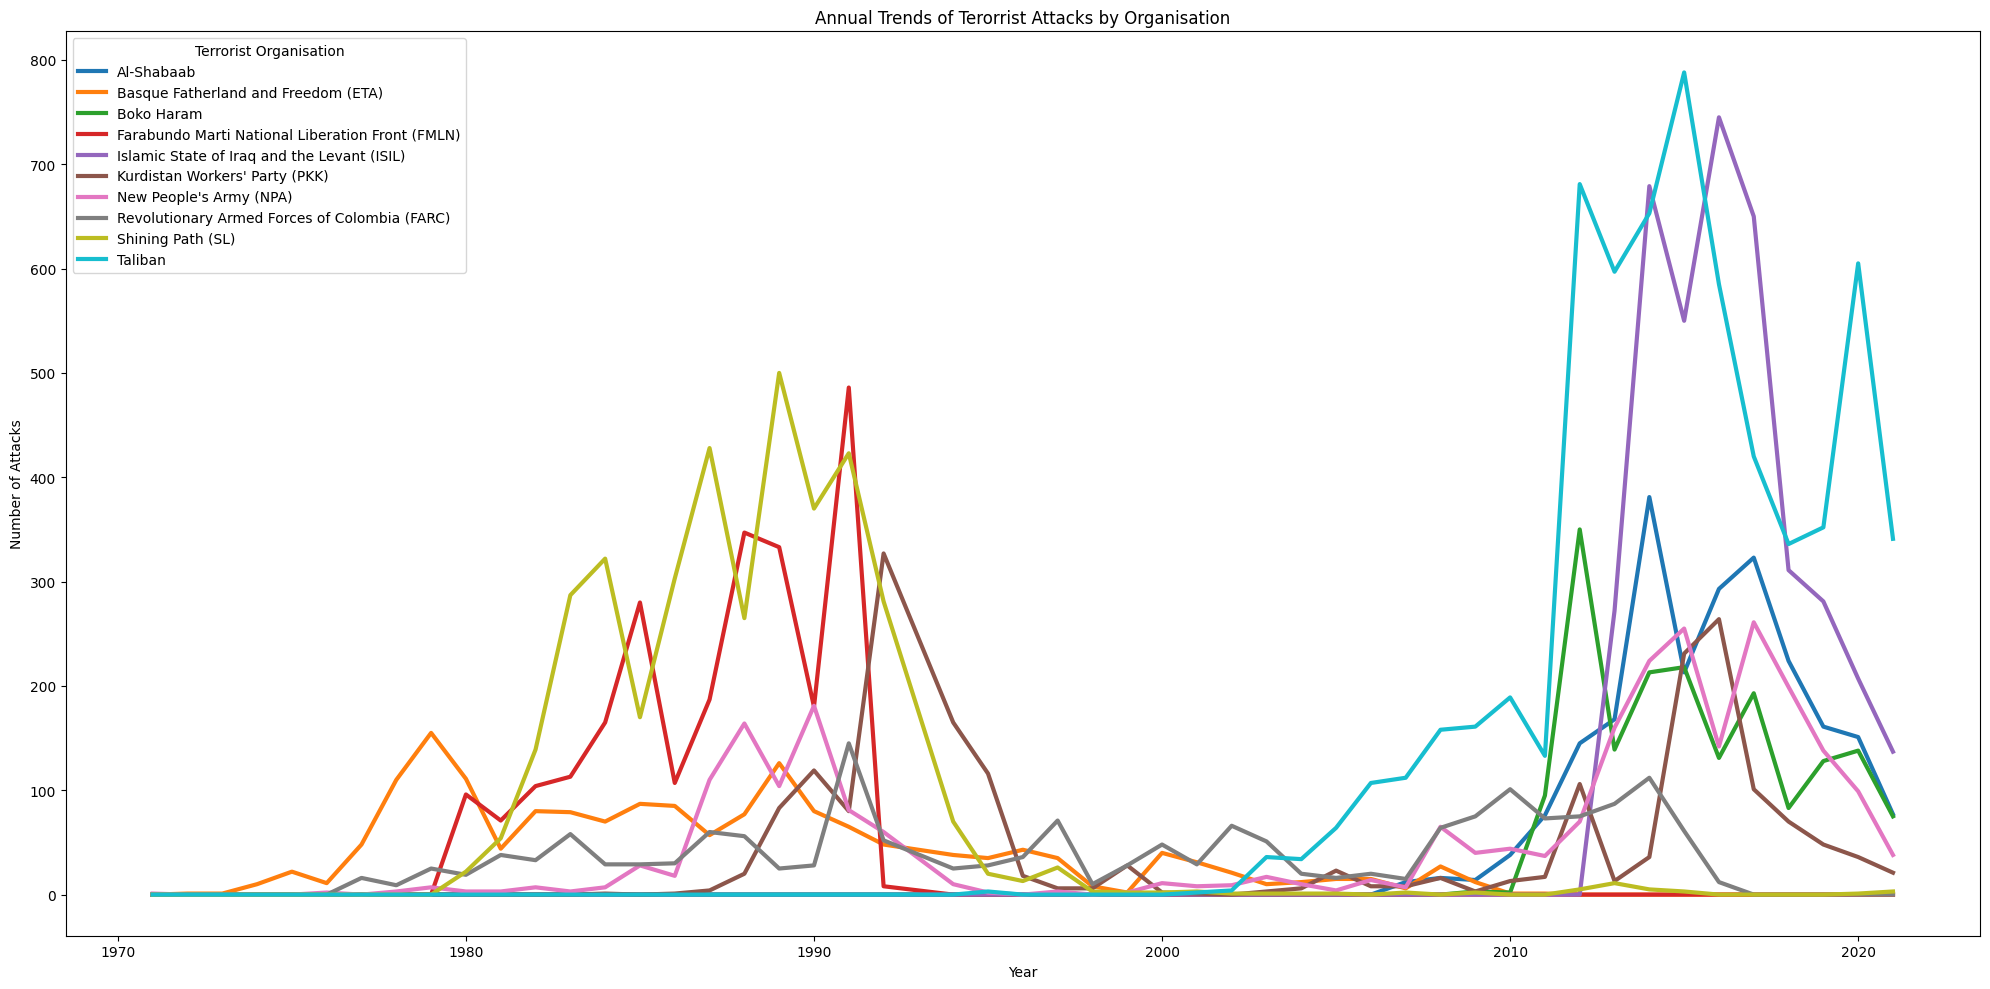

In [39]:
#Visualize atack trends of the chosen groups over the years 1970-2020
grouped_data = df.groupby(['iyear', 'gname']).size().unstack(fill_value=0) #Group year and organisation name for plotting

#Plot trends over the years
grouped_data.plot(kind='line', linewidth=3)
plt.title('Annual Trends of Terorrist Attacks by Organisation')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Terrorist Organisation', loc='upper left')

plt.gcf().set_size_inches(20, 10) #Adjusting plot size to avoid overlapping with key

plt.tight_layout()
plt.show()

This graph shows the annual trends of attacks per terrorist organisations. It can be seen that in recent years, groups such as the Talibans and the Islamic State of Iraq and the Levant have been responsible for most of the attacks. When compared to other organisations, these groups are recorded to have the highest number of attacks overall.

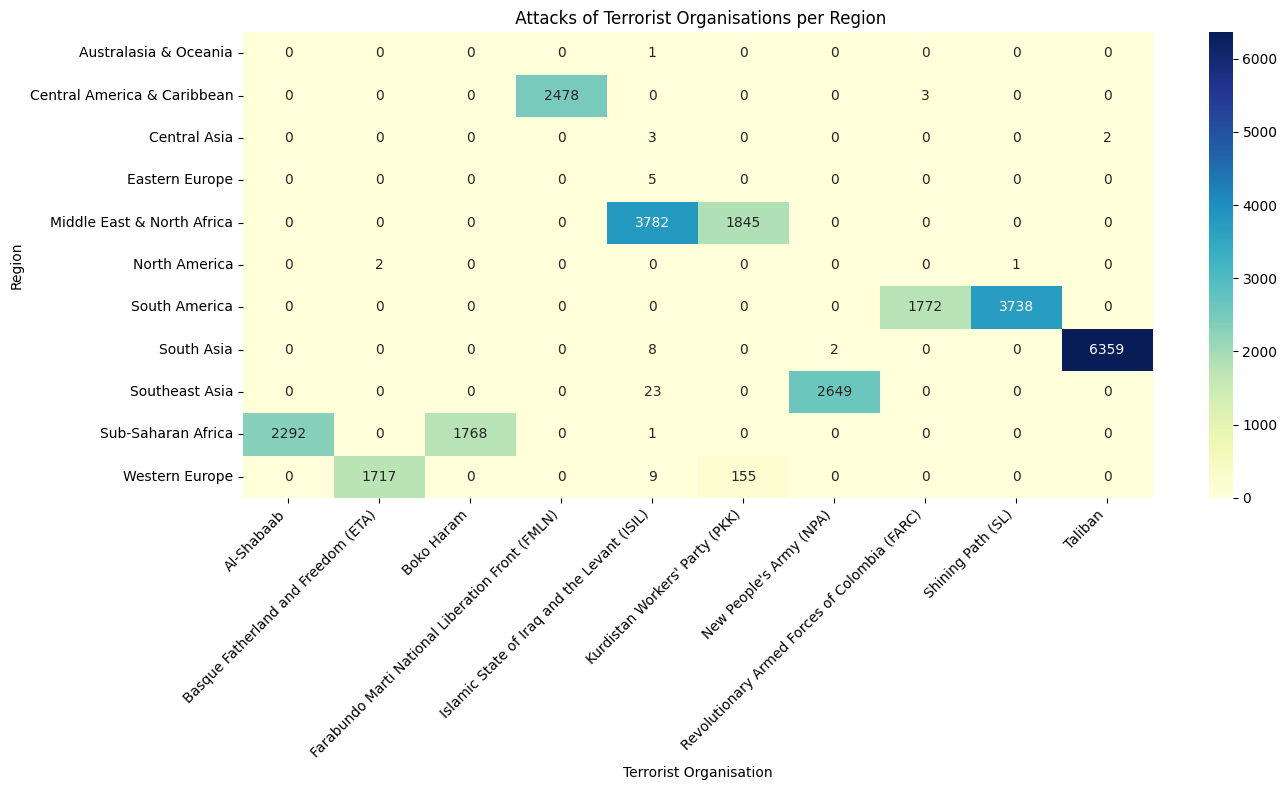

In [40]:
#Visualize the intensity of attacks per region based on terrorist group

#Group region and terrorist organisation group name in order to get the number of the counts
attack_counts = df.groupby(['region_txt', 'gname']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(attack_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title(' Attacks of Terrorist Organisations per Region')
plt.xlabel('Terrorist Organisation')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This heatmap shows the numer of attacks per region based on terorrist organisations. It can be seen that South Asia is one of the most attacked region, with the Talibans being responsible. On the other hand, regions such as Australasia & Ocenia, Central Aisa, Eastern Europe and North America are subject to a limited number of attacks.

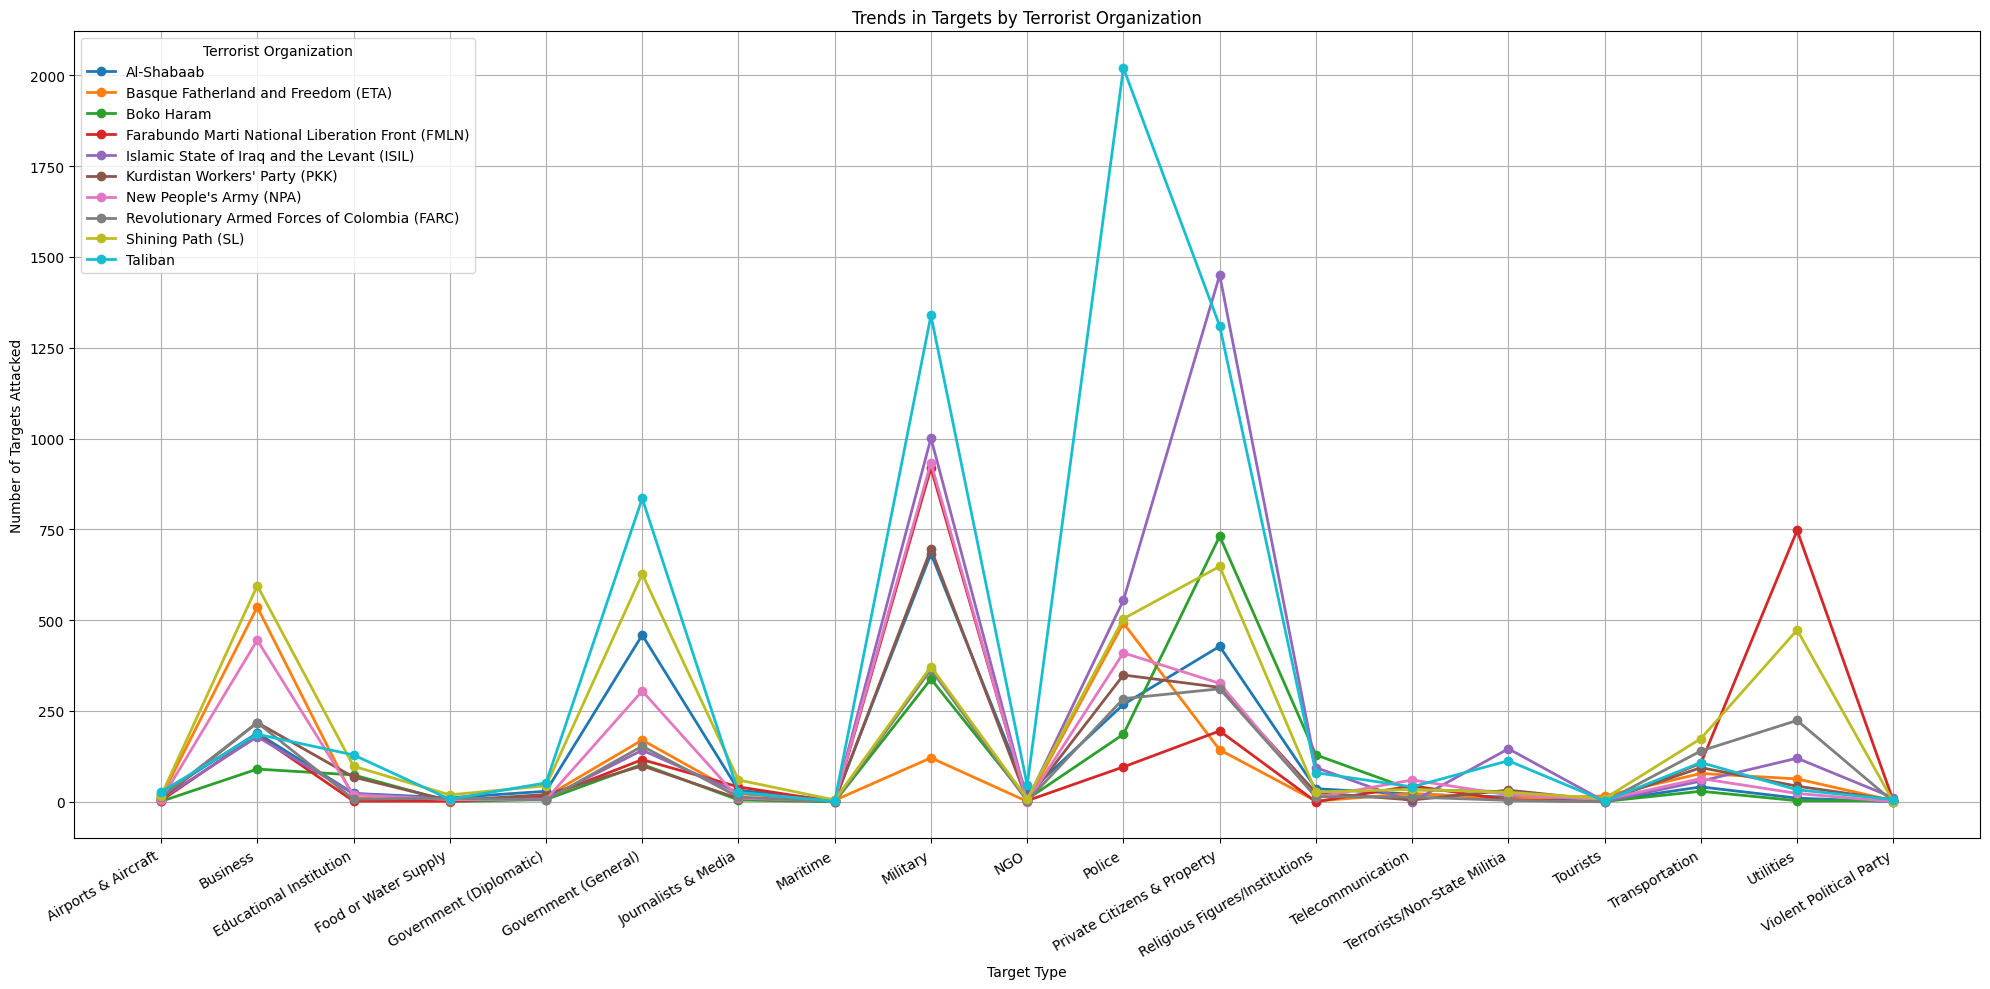

In [41]:
#Visualize trends in target types based on the organisation
grouped_data = df.groupby(['gname', 'targtype1_txt']).size().unstack(fill_value=0) #Group target type and organisation name for plotting

#Plot trends for each group
plt.figure(figsize=(20, 10))
for group in grouped_data.index:
    plt.plot(grouped_data.columns, grouped_data.loc[group], label=group, marker='o', linewidth=2)

plt.title('Trends in Targets by Terrorist Organization')
plt.xlabel('Target Type')
plt.xticks(rotation=30, ha='right') #Rotate target label to read easier
plt.ylabel('Number of Targets Attacked')
plt.legend(title='Terrorist Organization', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

This graph shows the trends in targets attacked by terrorist organisations. The most attacked targets are the police and/or private citizens and property. These attacks were mostly conducted by the Taliban or ISIL. On the other hand, food or water supplies, maritime targets, NGOs, telecommunication and tourists were the least attacked targets. 

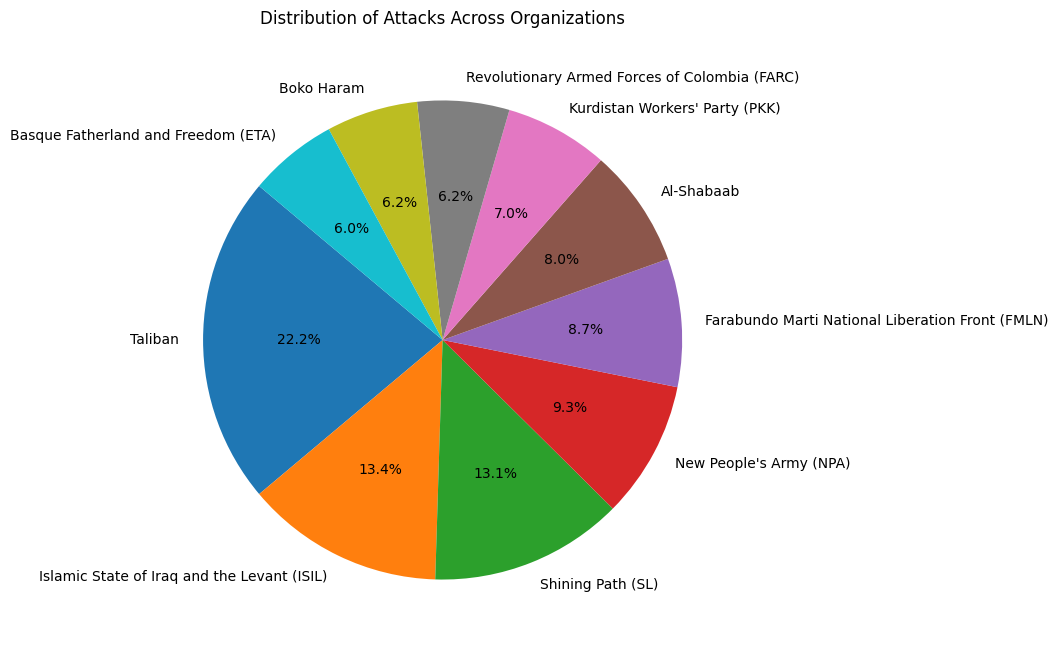

In [42]:
#Visualize distribution of attacks across organisations
import matplotlib.pyplot as plt
plt.figure(figsize=(6.8, 8))  # Set the figure size (optional)

#Count number of attacks per group in order to visualize their distribution
group_counts = df['gname'].value_counts()

# Plot pie chart
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attacks Across Organizations')
plt.axis('equal')
plt.show()

This plot reveals an imbalance in the dataset, which can later affect the accuracy of the model and its predictions. This imbalance can be explained by attack behavior of the terrorist organisations, as well as other factors such as lack of reports and data collection of attacks based on different motives. This issue will be further explored in the Auditing Phase of the model.

### Preparing the Data

In [43]:
#Encode categorical values to reduce complexity of model and work with binary values as required by the Classifier
#Convert everything to integer to ensure it is compatible with the classification process
target_dummies=pd.get_dummies(df['targtype1_txt'], drop_first=True) #target types
targets = target_dummies.astype(int)

attack_dummies=pd.get_dummies(df['attacktype1_txt'], drop_first=True) #attack types
attacks=attack_dummies.astype(int)

region_dummies=pd.get_dummies(df['region_txt'], drop_first=True) #region
region = region_dummies.astype(int)

weapon_dummies=pd.get_dummies(df['weaptype1_txt'], drop_first=True) #weapon types
weapons=weapon_dummies.astype(int)

property=df['property'].astype(int) #attacks on property

victims=df['victims_total'].astype(int) #number of victims 

criteria_def=df[['crit1', 'crit2', 'crit3']] #select the criteria features from dataset - these are already binary and integers

In [44]:
#Define Y which is the outcome value or the value we want to predict. In this case we want to predict 
#the terorrist group responsible for the attack

Y=df['gname']

#Define X which is all of the features that would help the model classify and predict groups responsible for an attack
# All values are concatenated to combine all features into one dataframe which will be used to train the model
X= pd.concat([attacks, weapons, property, targets, victims, region, criteria_def], axis=1)

#Check shape of X and Y to enusre they are the same in order to avoid issues of mismatching dataframes, 
#which would cause an error and prevent the model from training
print(f"X shape: {X.shape}, y shape: {Y.shape}")

X shape: (28615, 46), y shape: (28615,)


### Fitting the Model

In [45]:
#Set train and test sets for model
#We use 70% of the data to train the model and 30% to test the model in order to check how the model works with new data
test_size = 0.30
random_state = 42 #Setting a rnadom state ensures that the model will always produce the same results when run

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (20030, 46), y_train shape: (20030,)
X_test shape: (8585, 46), y_test shape: (8585,)


In [46]:
#Define model used - Random Forest for classification
#Set parameters for the model to ensure it is accurate and effective, 
#these parameters influence the way the model performs and how it is trained
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7, max_features='sqrt')
                                                
#Fit model on the training sets
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred_rfcls = model.predict(X_test)
pred_prob = model.predict_proba(X_test)


### Evaluate Model

In [47]:
#Evaluate model performance using accuracy of metircs 

#Calculate accuracy score - this measures the overall corectness of predictions
accuracy_rf = accuracy_score(y_test, y_pred_rfcls)

#Calculate balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred_rfcls)

#Calculate precision score
precision = precision_score(y_test, y_pred_rfcls, average='weighted') #weighted means that the contribution of each class is weighted by its size

#Calculate recall score
recall = recall_score(y_test, y_pred_rfcls, average='weighted')

#Calculate F1 score - provides a balnce between recall and precision
f1 = f1_score(y_test, y_pred_rfcls, average='weighted')

# Print all scores
print("Accuracy:", accuracy_rf)
print("Balanced Accuracy:", balanced_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8472917880023296
Balanced Accuracy: 0.773771505147566
Precision: 0.8641134494812908
Recall: 0.8472917880023296
F1 Score: 0.8167654938382922


All evaluation metrics score over 75% showing that the model performs fairly well and can make accurate predictions. However, there is room for improvement, especially regarding the Balanced Accuracy which shows the correctness of predictions with regard to the imbalances in the dataset.

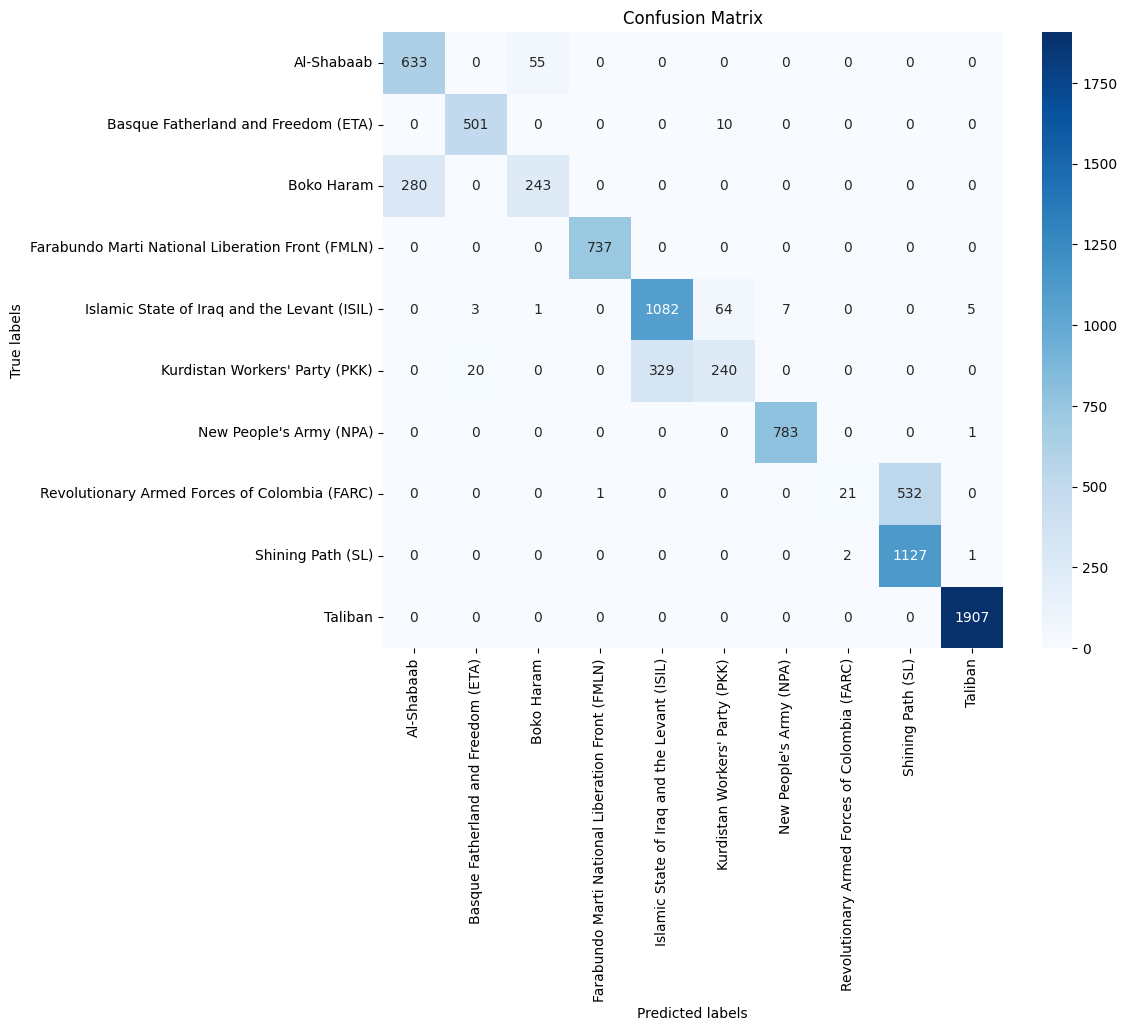

In [48]:
#Analyze model using Confusion Matrix which shows how many predictions were correct and how many were incorrect
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Create confustion matrix using the test values and predictions
conf_matrix = confusion_matrix(y_test, y_pred_rfcls)

unique_labels = df['gname'].unique()
sorted_labels = sorted(unique_labels) #Sort groups in alphabetical order

#Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix shows the correct predictions in relation to the incorrect ones. In general, the model is able to classify and differentiate classes. However, some misclassification issues can be seen for certain groups the model is having difficulty classifying attacks belonging to these organisations correctly. This can be explained by the imbalanced dataset, hyperparameters or features used. 

### Auditing the Model - Checking for Bias

Considering the purpose of the model, it is important to ensure the algorithm does not reinforce any biases or stigma that could lead to the wrongful accusation of specific groups. Upon analysing the features used to train the classifier,imbalance in the data was identified. The imbalanced distribution of attacks across groups  pose the risk of profiling and stigma, as the model can misclassify the responsible organisations and create a link between terrorism and a specific groups. 

To examine the potential of biases and data imbalance, an audit was put in place. The main approach used for analysis is the Group Fairness perspective, with a focus on ensuring that the model is not biased and error rate for false positives is limited. This would ensure that no organisation would be wrongfully accused of a crime they did not commit. The fairness metric implemented is Equal False Positive Rate.

The pie chart below shows the issue of data imbalance which can be the cause of bias.

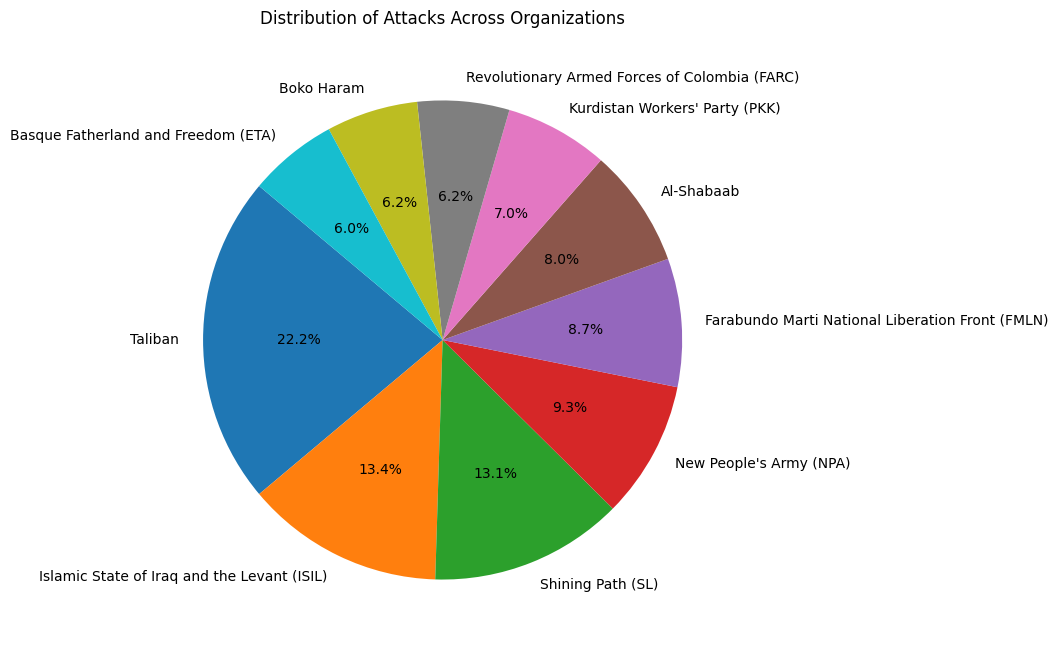

In [49]:
import matplotlib.pyplot as plt
#Visualize distribution of attacks across organisations
plt.figure(figsize=(6.8, 8))  # Set the figure size (optional)

# Count number of attacks per group
group_counts = df['gname'].value_counts()

# Plot pie chart
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attacks Across Organizations')
plt.axis('equal')
plt.show()

False Positive Rate for Al-Shabaab: 0.035456502469292134
False Positive Rate for Basque Fatherland and Freedom (ETA): 0.002848649987614565
False Positive Rate for Boko Haram: 0.006946167204167701
False Positive Rate for Farabundo Marti National Liberation Front (FMLN): 0.00012742099898063202
False Positive Rate for Islamic State of Iraq and the Levant (ISIL): 0.04432170281557322
False Positive Rate for Kurdistan Workers' Party (PKK): 0.009254627313656828
False Positive Rate for New People's Army (NPA): 0.0008973208563004743
False Positive Rate for Revolutionary Armed Forces of Colombia (FARC): 0.00024903498941601296
False Positive Rate for Shining Path (SL): 0.07136150234741784
False Positive Rate for Taliban: 0.0010482180293501049


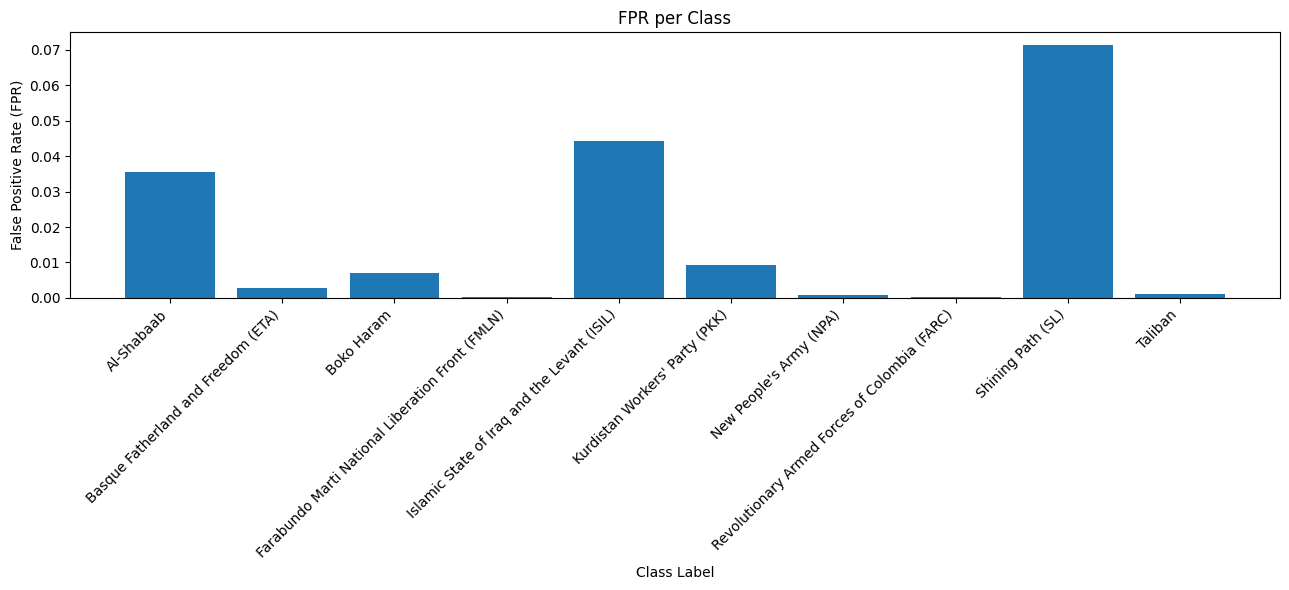

In [50]:
from sklearn.preprocessing import LabelEncoder
#Create function to calculate the FPR
def calculate_fpr(y_test, y_pred, organisation):
    #Create binary variables applying the one versus rate method - this is necessary because the model is a
    #multi-class classifier and we need to calculate the FPR for each class
    y_test_b = (y_test == organisation).astype(int)
    y_pred_b = (y_pred == organisation).astype(int)
    
    # Calculate confusion matrix
    true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_test_b, y_pred_b).ravel()
    
    # Calculate False Positive Rate (FPR)
    false_pos_rate = false_pos / (false_pos + true_neg) if false_pos + true_neg != 0 else 0
    
    return false_pos_rate

#Encode labels to work with numerical values since y test is categorical as it includes the names of the terorrist groups
#This is needed because the FPR function requires numerical values to calculate the FPR
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
labels = label_encoder.classes_
for organisation in labels:
    FPR_equality = calculate_fpr(y_test, y_pred_rfcls, organisation)
    print(f'False Positive Rate for {organisation}: {FPR_equality}')


#Visualize FPR rates per class
all = [calculate_fpr(y_test, y_pred_rfcls, organisation) for organisation in labels]
plt.figure(figsize=(13, 6))
plt.bar(labels, all)
plt.xlabel('Class Label')
plt.ylabel('False Positive Rate (FPR)')
plt.title('FPR per Class')
plt.xticks(rotation=45, ha="right")

#Adjust the layout to make sure everything fits
plt.tight_layout()
plt.show()

The results of the False Positive Rate Equality show significant differences between classes, with some facing a higher risk of being misclassified, such as the Islamic State of Iraq and the Levant or the Shining Path organisation. This risk can lead to wrongful accusation, affecting human and freedom rights. 

To reduce this bias, the weighting method is applied. This strategy forces the model to assign more improtance to correctly classifying minority groups based on their proportions in the dataset. Therefore, groups who have less data will have a high weight in order to balance their improtance in the training process and reduce false postives. 

#### Mitigating Bias

In [51]:
#Calculate class weights to balance the model through inverse proportion of the class sizes, this will reduce model bias

#Count number of classes and attacks per each class
classes, counts = np.unique(y_train, return_counts=True)

#Assign weights to each class based on the number of attacks per class
weights = len(y_train) / counts
raw_weights = dict(zip(classes, weights))

#Normalize weights to ensure they sum up to 1
total_weights = sum(raw_weights.values())
class_weights = {k: v / total_weights for k, v in raw_weights.items()}
print(class_weights)


{'Al-Shabaab': 0.10612625091571055, 'Basque Fatherland and Freedom (ETA)': 0.14091598217615872, 'Boko Haram': 0.1367281176456223, 'Farabundo Marti National Liberation Front (FMLN)': 0.09777513295163684, 'Islamic State of Iraq and the Levant (ISIL)': 0.06375524586846432, "Kurdistan Workers' Party (PKK)": 0.1206424567461373, "New People's Army (NPA)": 0.09117648980653441, 'Revolutionary Armed Forces of Colombia (FARC)': 0.13941564821359517, 'Shining Path (SL)': 0.06524588212679178, 'Taliban': 0.03821879354934884}


In [52]:
#Set train and test sets for new model
test_size = 0.30
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (20030, 46), y_train shape: (20030,)
X_test shape: (8585, 46), y_test shape: (8585,)


In [53]:
#Define the new model the same way as before but with the class weights included in order to see if it will reduce bias
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7, max_features='sqrt', class_weight=class_weights)
                                                
#Fit model
model.fit(X_train, y_train)

#Make predictions
y_pred_weighted = model.predict(X_test)
pred_prob = model.predict_proba(X_test)


In [54]:
#Evaluate model performance using a variety of metircs 

#Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_weighted)

#Calculate balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred_weighted)

#Calculate precision score
precision = precision_score(y_test, y_pred_weighted, average='weighted') #weighted means that the contribution of each class is weighted by its size

#Calculate recall score
recall = recall_score(y_test, y_pred_weighted, average='weighted')

#Calculate F1 score
f1 = f1_score(y_test, y_pred_weighted, average='weighted')

# Print all scores
print("Accuracy:", accuracy_rf)
print("Balanced Accuracy:", balanced_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8392545136866628
Balanced Accuracy: 0.8072892909803049
Precision: 0.838527569624731
Recall: 0.8392545136866628
F1 Score: 0.8385446365914155


Upon inspecting the different evaluation metrics and the performance of the model with weighted classes, two effects are noticed. First, the model's general accuracy, precision, recall and F1 score slightly decreased. While this result is usually undesired, it is overshadowed by the increase in the balanced accuracy. This means that the model's predictions are more accurate across all classes, considering the existing data imbalance. Given that the evaluation metrics are all over 0.80, it can be argued that the model performs well and achieves the goal of accurate predictions. 

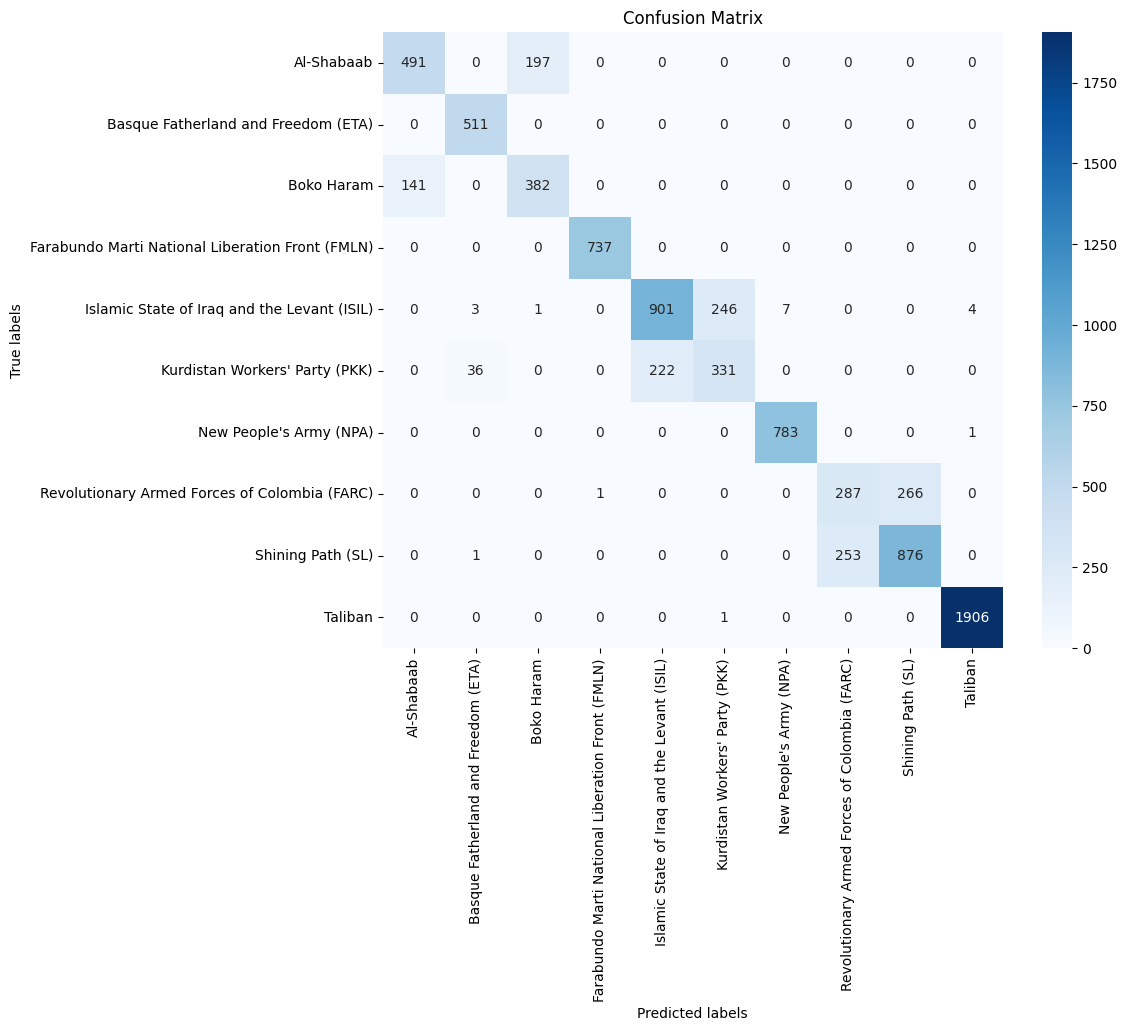

In [55]:
#Visualize confusion matrix to determine how the model performs with the new class weights and check for wrong predictions
conf_matrix = confusion_matrix(y_test, y_pred_weighted)

unique_labels = df['gname'].unique()
sorted_labels = sorted(unique_labels) #Sort groups in alphabetical order

#Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Analysing the confusion matrix, the addition of weights to the model has improved the classification of certain classes, while making it worse for some others. However, in comparison to the previous matrix, adding weights to the model increases accuracy of predictions for the classes that suffered the highest levels of misclassification.

False Positive Rate for Al-Shabaab: 0.017854881600607827
False Positive Rate for Basque Fatherland and Freedom (ETA): 0.0049541738915035915
False Positive Rate for Boko Haram: 0.024559662614735796
False Positive Rate for Farabundo Marti National Liberation Front (FMLN): 0.00012742099898063202
False Positive Rate for Islamic State of Iraq and the Levant (ISIL): 0.029907045668867035
False Positive Rate for Kurdistan Workers' Party (PKK): 0.030890445222611307
False Positive Rate for New People's Army (NPA): 0.0008973208563004743
False Positive Rate for Revolutionary Armed Forces of Colombia (FARC): 0.03150292616112564
False Positive Rate for Shining Path (SL): 0.03568075117370892
False Positive Rate for Taliban: 0.0007487271638215035


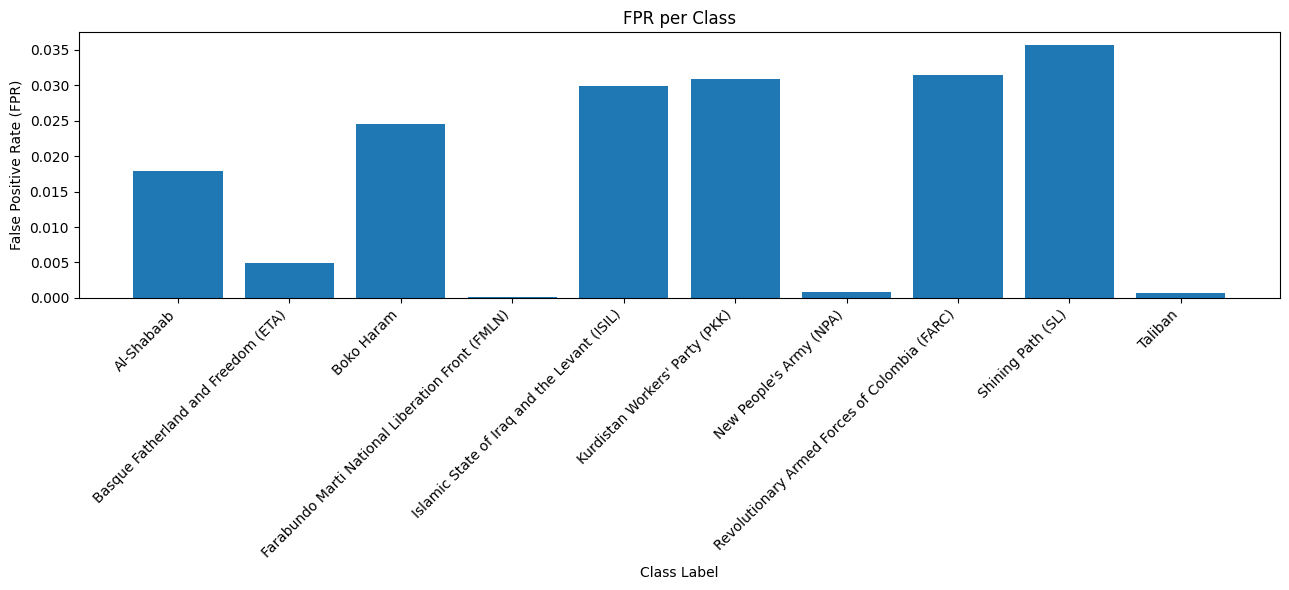

In [56]:
#Recalucate FPR rates for each terrorist organisation to check if class weights have reduced bias in the model predictions

#Encode labels to work with numerical values since y test is categorical as it includes the names of the terorrist groups
#This is needed because the FPR function requires numerical values to calculate the FPR
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
labels = label_encoder.classes_
for organisation in labels:
    FPR_equality = calculate_fpr(y_test, y_pred_weighted, organisation)
    print(f'False Positive Rate for {organisation}: {FPR_equality}')

#Visualize FPR rates per class
all = [calculate_fpr(y_test, y_pred_weighted, organisation) for organisation in labels]
plt.figure(figsize=(13, 6))
plt.bar(labels, all)
plt.xlabel('Class Label')
plt.ylabel('False Positive Rate (FPR)')
plt.title('FPR per Class')
plt.xticks(rotation=45, ha="right")

#Adjust layout to ensure everything fits
plt.tight_layout()
plt.show()

The calculation and visualization of the False Positive Rate shows a more balanced classification, as the rate for a majority of the groups is similar, which is the goal of the bias reduction technique. This reflects that the model is now less biased on groups with minimal data, and can accurately classify terrorist groups based on attack information wit limited bias or influence caused by data imbalances.

### Visualizing Model Decisions

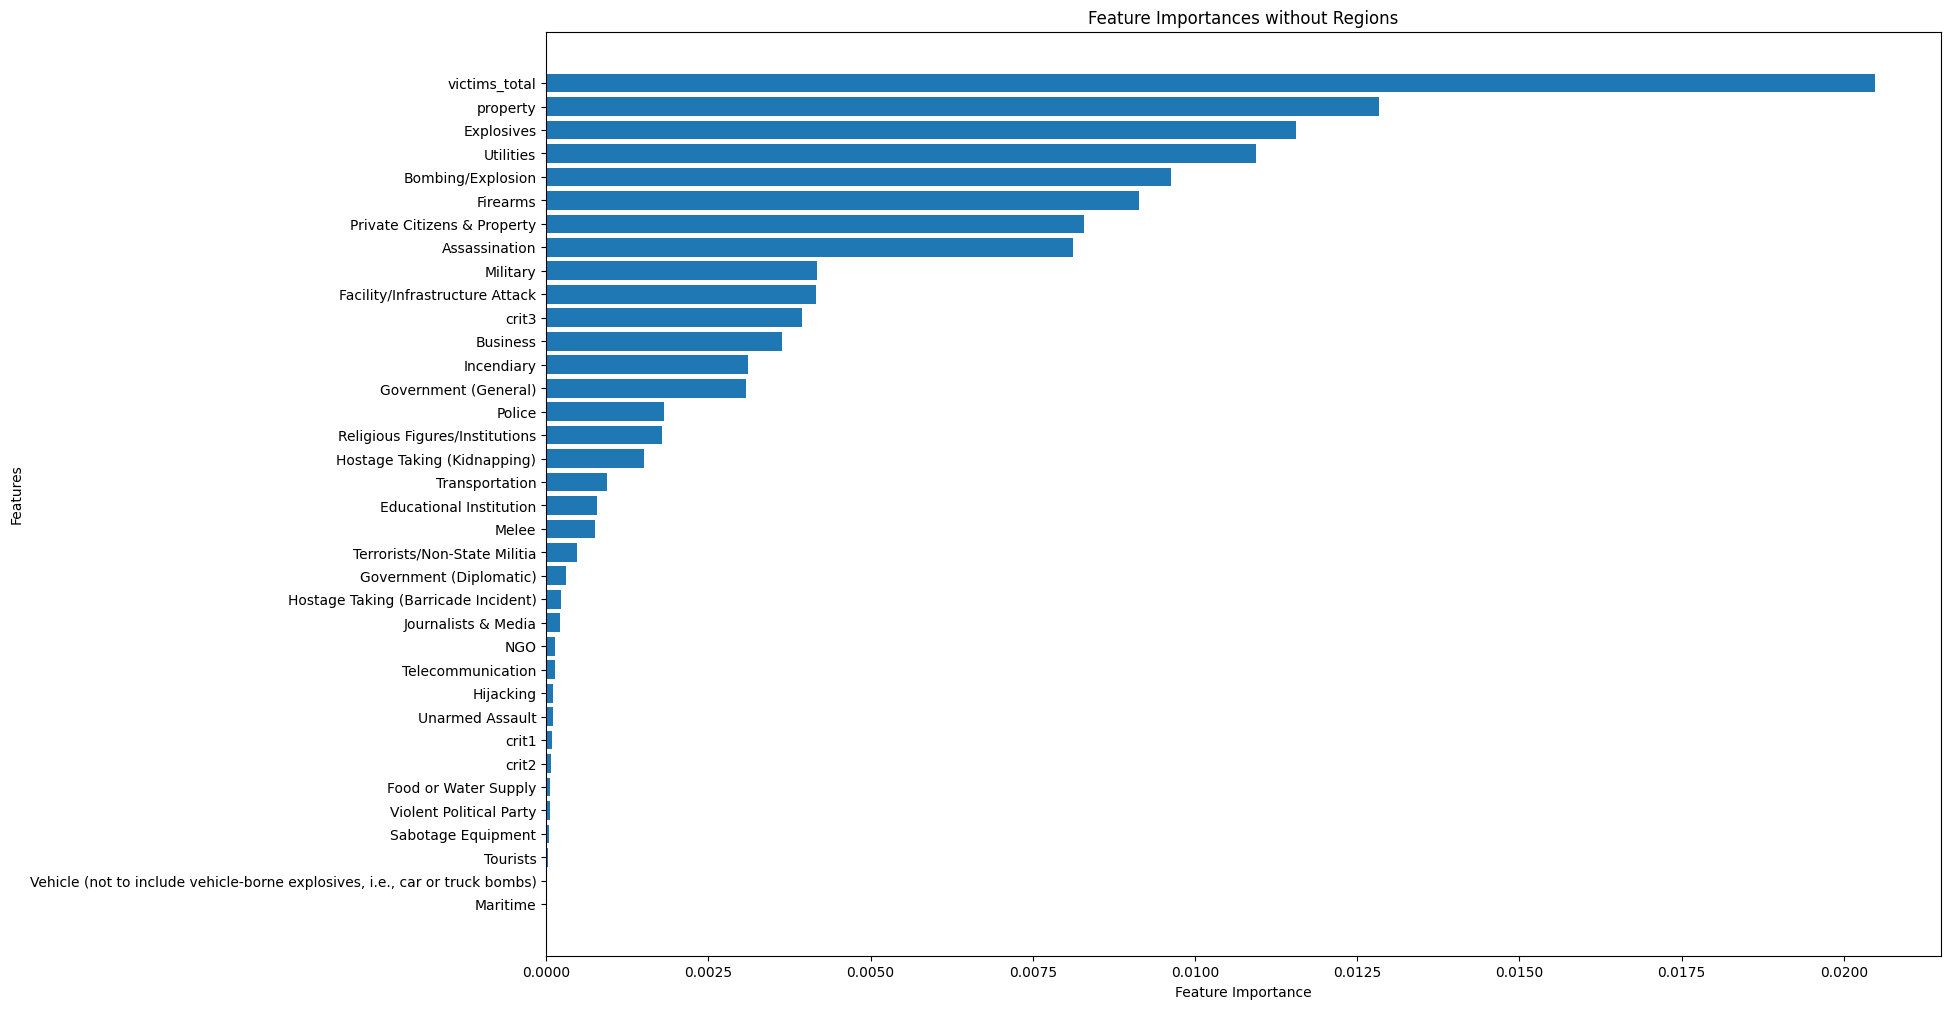

In [57]:
#Visualize how the model makes decisions through feature importance. This ranks the features based on their importance in making
#predictions and helps understand the relevance of each feature in the model.

#Plot feature importances for values excluding regions. This is because we wanted to separate the regions from the rest of the features.
feature_importances = model.feature_importances_

#Create list with the features we want to exclude
exclude = ['Central America & Caribbean', 'Central Asia',
       'Eastern Europe', 'Middle East & North Africa', 'North America',
       'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa',
       'Western Europe']

#Retrieve the index of the regions in order to exclude them from the features
exclude_ind = [X_train.columns.get_loc(col) for col in exclude]

#Caclulate feature importance for the included features in order to establish their relevance and ranking in the model
included_ind = [i for i in range(len(X_train.columns)) if i not in exclude_ind]
feature_importance = feature_importances[included_ind]

#Extract names of features used
included_feature_names = [X_train.columns[i] for i in included_ind]

#Sort feature importances and corresponding feature names to create a rank based on importance
sorted_idx = np.argsort(feature_importance)
sorted_importances = feature_importance[sorted_idx]
sorted_names = [included_feature_names[i] for i in sorted_idx]

#Display plot
plt.figure(figsize=(18, 12))
plt.barh(range(len(sorted_idx)), sorted_importances, align="center")
plt.yticks(range(len(sorted_idx)), sorted_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances without Regions")
plt.show()


The plot shows the importance of features when the model is making predictions. As shown in the plot, the number of people wounded and killed plays a significant role in the model's decision-making process. This is followed by property and attack types. 

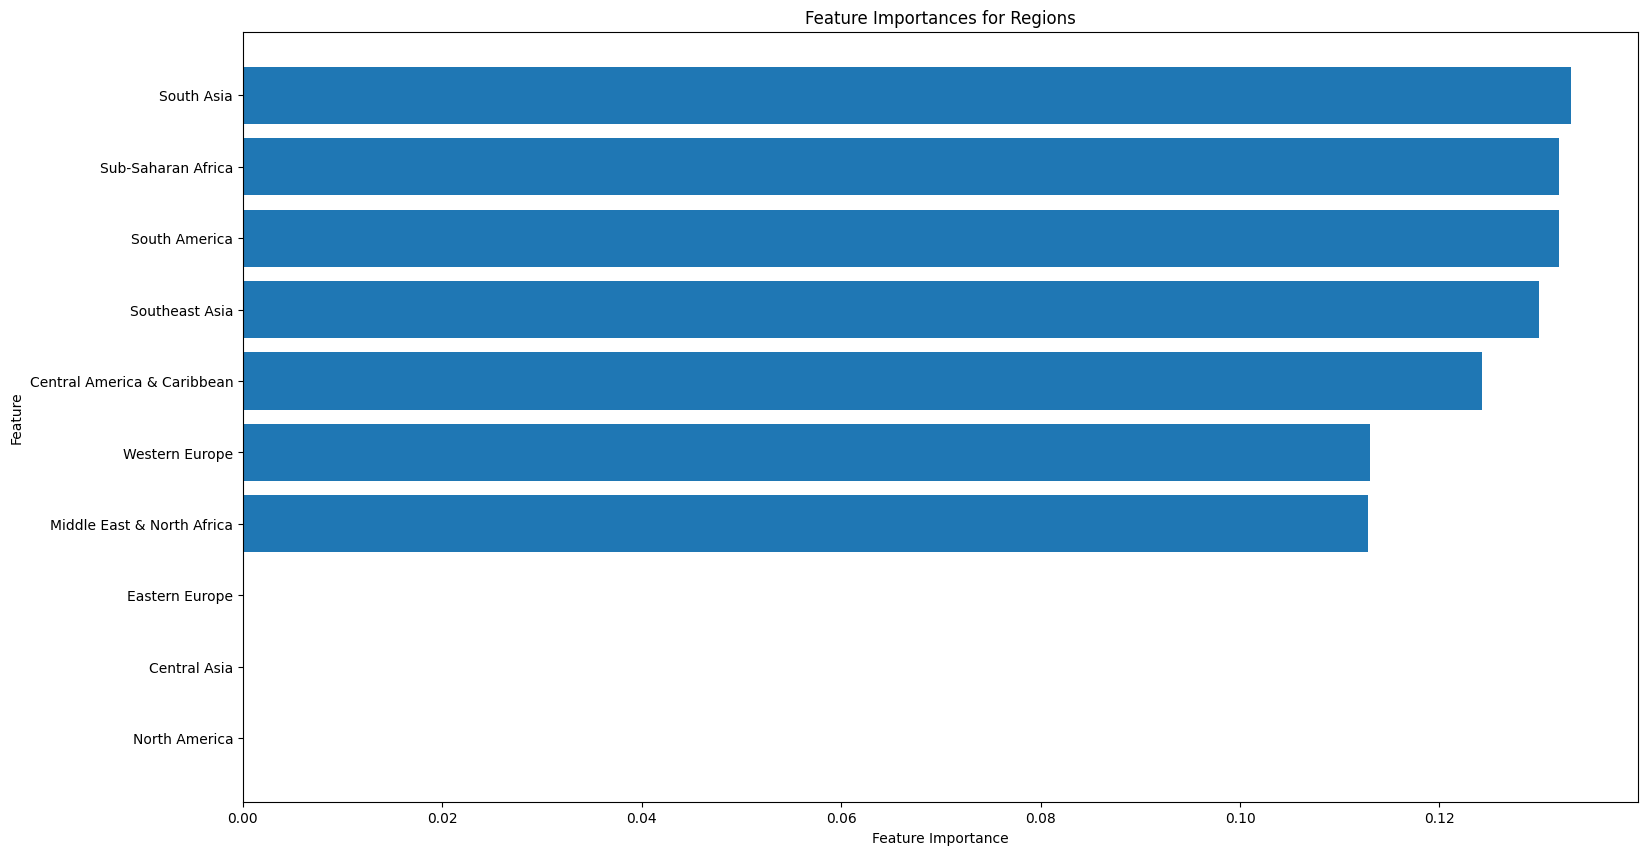

In [58]:
#Visualize feature importances for region values only
feature_importances = model.feature_importances_ #Get feature importance

#Select only region values
regions = ['Central America & Caribbean', 'Central Asia',
       'Eastern Europe', 'Middle East & North Africa', 'North America',
       'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa',
       'Western Europe']

# Get the index of columns to exclude
region_indices = [X_train.columns.get_loc(col) for col in regions]

# Calculate feature importance for columns not in columns_to_exclude
feature_importance = feature_importances[region_indices]

# Get the names of the included columns
feature_names = [X_train.columns[i] for i in region_indices]
import matplotlib.pyplot as plt

# Assuming you have included_feature_importances and included_feature_names
# Sort feature importances and corresponding feature names
sorted_idx = np.argsort(feature_importance)
sorted_importances = feature_importance[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plot feature importances
plt.figure(figsize=(18, 10))
plt.barh(range(len(sorted_idx)), sorted_importances, align="center")
plt.yticks(range(len(sorted_idx)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for Regions")
plt.show()


This plot shows feature importance ranking for regions where the attacks occured. In general, all regions have a somewhat similar importance in the model. However, Sub-Saharan Africa and South America are the top regions as most important in terms of decision-making in the model.

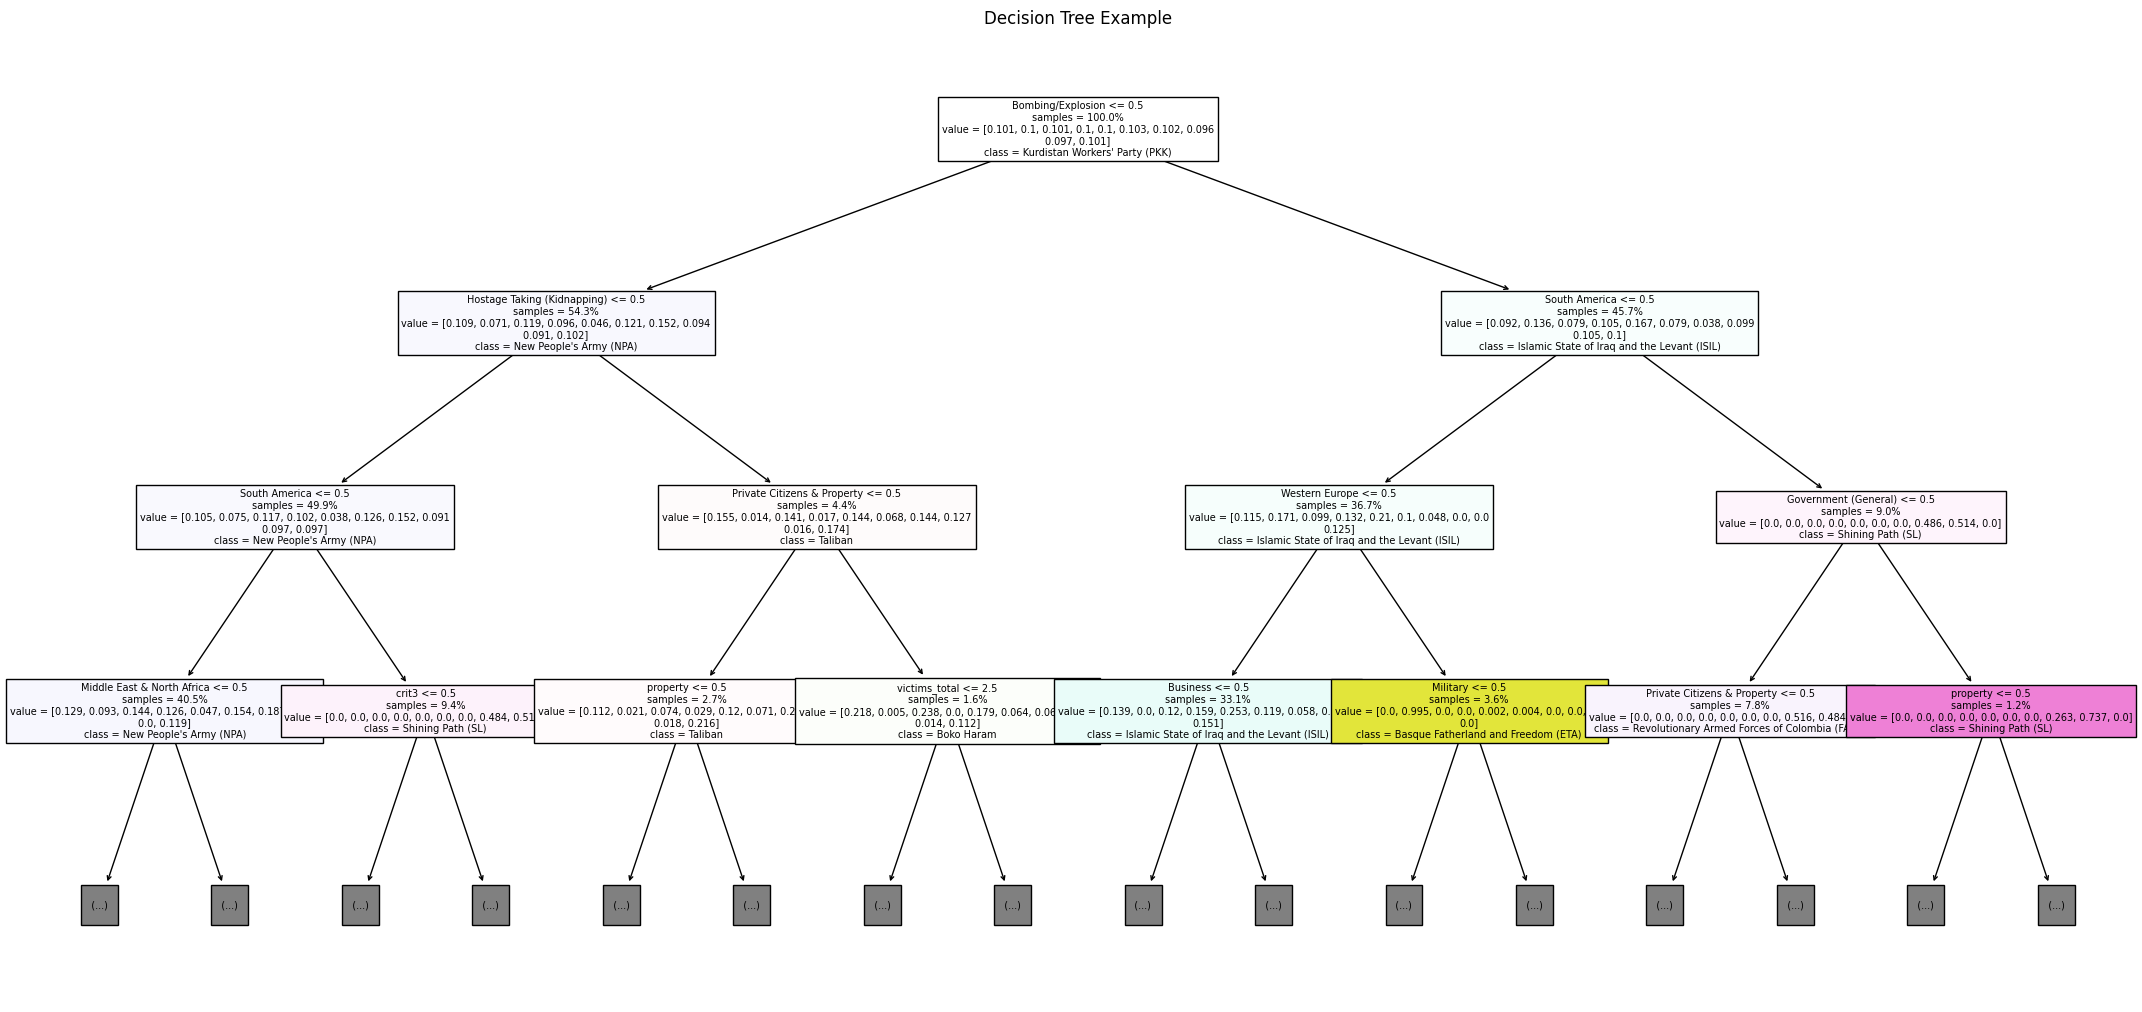

In [59]:
#View decision-makign process by visualizing a tree from the model, this allows us to understand how the model is making its decisions and what features are being used
for i in range(1): #Selecting one tree sample from the forest to visualize how a decision is made
    tree = model.estimators_[i]
    plt.figure(figsize=(22, 10))
    plot_tree(tree,
              feature_names=X_train.columns,
              class_names=model.classes_,
              filled=True,
              max_depth=3,
              impurity=False,
              proportion=True,
              ) 
    plt.gcf().set_facecolor('white') #Set background to white
    for text in plt.gca().texts:
        text.set_fontsize(7)
    plt.tight_layout() 
    plt.title("Decision Tree Example")
    plt.show()


This plot shows a random tree selected from the forest created by the model. Here we can visualize the decision-making process of the tree and better understand how the model works behind the scenes. In this case, the root node is bombing (attack type). If the attack is classified as bombing, then the model looks at the region where it takes place. If not, the model considers another type of attack that is probable and so on.

### Testing the Model with User Input

The follow section tests the model performance as if it would be used in a real-world scenario. The model is given an input of details or features known about a terrorist event (such as region where it occured and type of weapons used). Then, the model makes predictions and displays the most likely groups resposible for the attack (top 3) along with the certainiy of the prediction. 

These outputs are compared with the attack count from the dataset, to understand if the predictions made by the model reflect the behaviors collected in the dataset.

##### Test 1

In [60]:

#Give model some input of features describing an attack
input_features = ['Southeast Asia',	'Bombing/Explosion', 'Explosives']
#These features indicate region, attack type and weapon type used during the event

#Create a dataframe to be processed by the model which will be used to make predictions
#In this dataframe, the features are being set to 0 except for the input features which are set to 1
test_df = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)
for feature in input_features:
    test_df[feature] = 1

#Predict groups that are most likely to be responsible along with the probability of this group to be responsible
prediction = model.predict_proba(test_df)
class_labels = model.classes_

#Extract top 3 predictions with highest probability
top_indices = np.argsort(prediction.ravel())[-3:]

#Print results
print("Potential Terrorist Organisation Responsible:")
for index in top_indices[::-1]: 
    label = class_labels[index] #Terrorist group name
    certainity = prediction.ravel()[index] #Certainity
    print(f"{label}, Certainty: {certainity:%}")

Potential Terrorist Organisation Responsible:
New People's Army (NPA), Certainty: 57.793983%
Islamic State of Iraq and the Levant (ISIL), Certainty: 11.759535%
Basque Fatherland and Freedom (ETA), Certainty: 6.087066%


In [61]:
#Describe attack features, used as input
input_features = ['Southeast Asia',	'Bombing/Explosion', 'Explosives']

#Create a dataframe of features to be processed by the model
test_df = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)
for feature in input_features:
    test_df[feature] = 1

#Predict groups responsible
prediction = model.predict_proba(test_df)
class_labels = model.classes_

#Extract top 3 predictions with highest probability
top_indices = np.argsort(prediction.ravel())[-3:]

#Print results
print("Potential Terrorist Organisations Responsible:")
for index in top_indices[::-1]: 
    label = class_labels[index] #Terrorist group name
    certainity = prediction.ravel()[index] #Certainity
    print(f"{label}, Certainty: {certainity:%}")

Potential Terrorist Organisations Responsible:
New People's Army (NPA), Certainty: 57.793983%
Islamic State of Iraq and the Levant (ISIL), Certainty: 11.759535%
Basque Fatherland and Freedom (ETA), Certainty: 6.087066%


In [62]:
#Verify predictions with attack counts from dataset

#Filter dataframe to include only values that match the input
check_df=df[(df['region_txt']=='Southeast Asia') & (df['attacktype1_txt']== 'Bombing/Explosion') & (df['weaptype1_txt']== 'Explosives')] 
group_check= check_df['gname'].value_counts() #Get attack counts
print(group_check)

gname
New People's Army (NPA)                        432
Islamic State of Iraq and the Levant (ISIL)     11
Name: count, dtype: int64


#### Test 2

In [63]:
#Give model some input of features describing an attack
input_features = ['Western Europe',	'Private Citizens & Property']
    #These features indicate the region and victims attacked during the terrorist event

#Create a dataframe to be processed by the model
test_df = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)

#Set the features from the input as 1 - This means that all of the features are 0, meaning that they are not descriptive of the event
for feature in input_features:
    test_df[feature] = 1

#Predict groups that are most likely to be responsible along with the certainity of the model
prediction = model.predict_proba(test_df)
class_labels = model.classes_

#Extract top 3 predictions with highest certainity
top_indices = np.argsort(prediction.ravel())[-3:]

#Print results
print("Potential Terrorist Organisation Responsible:")
for index in top_indices[::-1]: 
    label = class_labels[index] #Terrorist group name
    certainity = prediction.ravel()[index] #Certainity
    print(f"{label}, Certainty: {certainity:%}")

Potential Terrorist Organisation Responsible:
Basque Fatherland and Freedom (ETA), Certainty: 51.219890%
Kurdistan Workers' Party (PKK), Certainty: 10.874329%
New People's Army (NPA), Certainty: 6.467325%


In [64]:
#Verify predictions with attack counts from dataset

#Filter dataframe to include only values that match the input
check_df=df[(df['region_txt']=='Western Europe') & (df['targtype1_txt']== 'Private Citizens & Property')]
group_check= check_df['gname'].value_counts() #Get attack counts
print(group_check)

gname
Basque Fatherland and Freedom (ETA)            143
Kurdistan Workers' Party (PKK)                  20
Islamic State of Iraq and the Levant (ISIL)      1
Name: count, dtype: int64


#### Test 3

In [65]:
#Give model some input of features describing an attack
input_features = ['Sub-Saharan Africa',	'Government (General)']
     #These features indicate the region and victims attacked during the terrorist event

#Create a dataframe to be processed by the model
test_df = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)

#Set the features from the input as 1 - This means that all of the features are 0, meaning that they are not descriptive of the event
for feature in input_features:
    test_df[feature] = 1

#Predict groups that are most likely to be responsible along with the certainity of the model
prediction = model.predict_proba(test_df)
class_labels = model.classes_

#Extract top 3 predictions with highest certainity
top_indices = np.argsort(prediction.ravel())[-3:]

#Print results
print("Potential Terrorist Organisation Responsible:")
for index in top_indices[::-1]: 
    label = class_labels[index] #Terrorist group name
    certainity = prediction.ravel()[index] #Certainity
    print(f"{label}, Certainty: {certainity:%}")

Potential Terrorist Organisation Responsible:
Al-Shabaab, Certainty: 42.783665%
Boko Haram, Certainty: 30.548680%
New People's Army (NPA), Certainty: 4.449962%


In [66]:
#Verify predictions with attack counts from dataset

#Filter dataframe to include only values that match the input
check_df=df[(df['region_txt']=='Sub-Saharan Africa') & (df['targtype1_txt']== 'Government (General)')]
group_check= check_df['gname'].value_counts() #Get attack counts
print(group_check)

gname
Al-Shabaab                                     459
Boko Haram                                     103
Islamic State of Iraq and the Levant (ISIL)      1
Name: count, dtype: int64


These tests reveals that the model is able to provide accurate predictions based on the given input. While it has been noticed that the 3rd group predicted is missclassified, the first 2 predictions are accurate in terms of names as well as probability of group being responsible given the attack counts recorded in the datasets. 